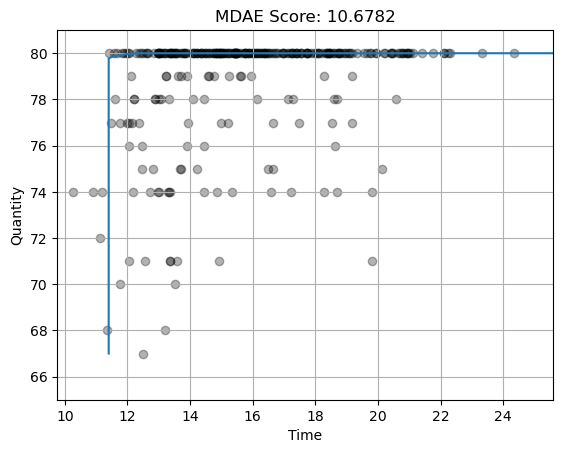

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error


errors = {
    'R2': 'r2_score',
    'MSE': 'mean_squared_error',
    'MAE': 'mean_absolute_error',
    'MDAE': 'median_absolute_error'#,
    # 'RMSE': 'np.sqrt(median_absolute_error)'
}
error_name = 'MDAE' # CHANGE THE MIN/MAX AT LINE 87 BASED ON WHICH MEASURE YOU CHOOSE!

data = pd.read_csv('../Dataset/Alex Mullen - Numbers.txt')

convergence = max(data.loc[data.iloc[:, 0] != 80].iloc[:, 1])
mask = data.iloc[:, 1] > convergence + 5
data = data.drop(data[mask].index)
mask = data.iloc[:, 0] < 65
data = data.drop(data[mask].index)

m = min(data.loc[data.iloc[:, 0] == 80].iloc[:, 1])
min_x = min(data.iloc[:, 1])

dx_original = data.iloc[:, 1]
dx = []
for el in list(dx_original):
    dx.append(el) if el >= m else dx.append(m)
dx = np.array(dx)
dy = data.iloc[:, 0]




x = np.linspace(m, 60, 1000)

def q_finder(n):
    for q in range(-100, 100): #list(frange(-100, 100, decimal.Decimal('0.1'))):
        if f(convergence, n) + q - 80 < 1 and f(convergence, n) + q - 80 > 0:
            # print(f'q: {q}')
            return float(q)

def f(x, n):
    # print(f'f: {n*np.log(x - 9)}, {x}')
    return n*np.log(x - (m-0.1)) #if not np.any(np.isnan(x - m-0.1)) and not np.all(np.isfinite(x - m-0.1)) else print(x - m-0.1)

def f_pred(x, y, test_x):
    pred = []

    for el in list(test_x):
        if el < min(x):
            pred.append(list(y)[0])
        else:
            pred.append(list(y)[int(round(min(list(x), key=lambda x:abs(x-el)), 0))])
    
    return np.array(pred)

functions = {}
for n in np.linspace(0.1, 5, 20):
    function = f(x, n) + q_finder(n)

    y = []
    for element in list(function):
        if element <= 80 and element > 65:
           y.append(element)
        elif element > 80:
            y.append(80)
        else:
            y.append(65)
    y = np.array(y)
    y = np.concatenate((np.linspace(min(dy), min(y), 100), y))
    x_new = np.concatenate((np.linspace(min(dx), min(dx), 100), x))

    y_pred = f_pred(x_new, y, dx) #f(dx, n) + q_finder(n)
    
    error = eval(errors[error_name])(dy, y_pred)

    # print(f"R-squared score: {r2:.4f}")
    # plt.plot(x_new, y) # TOGGLE THIS LINE!!!
    
    functions[tuple(y)] = error

x = np.concatenate((np.linspace(min(dx), min(dx), 100), x))
y, error = np.array(list(functions.keys())[list(functions.values()).index(min(functions.values()))]), min(functions.values())
plt.plot(x, y)
plt.scatter(dx_original, dy, color='black', alpha=0.3)
plt.grid(True)
plt.xlim(min_x - 0.5, convergence + 5) # depending on the input data
plt.ylim(65, 81) # fixed
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.title(f'{error_name} Score: {error:.4f}')
plt.show()




# %%

# l = []
# df.apply(lambda row: l.extend([row.values]*(round((1/row[0]**10)*(10**19)))), axis = 1)
# print(l)



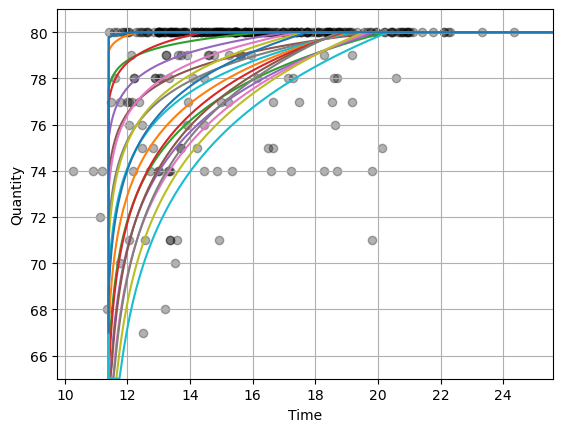

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error


errors = {
    'R2': 'r2_score',
    'MSE': 'mean_squared_error',
    'MAE': 'mean_absolute_error',
    'MDAE': 'median_absolute_error'#,
    # 'RMSE': 'np.sqrt(median_absolute_error)'
}
error_name = 'MDAE' # CHANGE THE MIN/MAX AT LINE 87 BASED ON WHICH MEASURE YOU CHOOSE!

data = pd.read_csv('../Dataset/Alex Mullen - Numbers.txt')

convergence = max(data.loc[data.iloc[:, 0] != 80].iloc[:, 1])
mask = data.iloc[:, 1] > convergence + 5
data = data.drop(data[mask].index)
mask = data.iloc[:, 0] < 65
data = data.drop(data[mask].index)

m = min(data.loc[data.iloc[:, 0] == 80].iloc[:, 1])
min_x = min(data.iloc[:, 1])

dx_original = data.iloc[:, 1]
dx = []
for el in list(dx_original):
    dx.append(el) if el >= m else dx.append(m)
dx = np.array(dx)
dy = data.iloc[:, 0]




x = np.linspace(m, 60, 1000)

def q_finder(n):
    for q in range(-100, 100): #list(frange(-100, 100, decimal.Decimal('0.1'))):
        if f(convergence, n) + q - 80 < 1 and f(convergence, n) + q - 80 > 0:
            # print(f'q: {q}')
            return float(q)

def f(x, n):
    # print(f'f: {n*np.log(x - 9)}, {x}')
    return n*np.log(x - (m-0.1)) #if not np.any(np.isnan(x - m-0.1)) and not np.all(np.isfinite(x - m-0.1)) else print(x - m-0.1)

def f_pred(x, y, test_x):
    pred = []

    for el in list(test_x):
        if el < min(x):
            pred.append(list(y)[0])
        else:
            pred.append(list(y)[int(round(min(list(x), key=lambda x:abs(x-el)), 0))])
    
    return np.array(pred)

functions = {}
for n in np.linspace(0.1, 5, 20):
    function = f(x, n) + q_finder(n)

    y = []
    for element in list(function):
        if element <= 80 and element > 65:
           y.append(element)
        elif element > 80:
            y.append(80)
        else:
            y.append(65)
    y = np.array(y)
    y = np.concatenate((np.linspace(min(dy), min(y), 100), y))
    x_new = np.concatenate((np.linspace(min(dx), min(dx), 100), x))

    y_pred = f_pred(x_new, y, dx) #f(dx, n) + q_finder(n)
    
    error = eval(errors[error_name])(dy, y_pred)

    # print(f"R-squared score: {r2:.4f}")
    plt.plot(x_new, y) # TOGGLE THIS LINE!!!
    
    functions[tuple(y)] = error

x = np.concatenate((np.linspace(min(dx), min(dx), 100), x))
y, error = np.array(list(functions.keys())[list(functions.values()).index(min(functions.values()))]), min(functions.values())
plt.plot(x, y)
plt.scatter(dx_original, dy, color='black', alpha=0.3)
plt.grid(True)
plt.xlim(min_x - 0.5, convergence + 5) # depending on the input data
plt.ylim(65, 81) # fixed
plt.xlabel('Time')
plt.ylabel('Quantity')
# plt.title(f'{error_name} Score: {error:.4f}')
plt.show()




# %%

# l = []
# df.apply(lambda row: l.extend([row.values]*(round((1/row[0]**10)*(10**19)))), axis = 1)
# print(l)

